In [24]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/Ragnarok540/pdg/main/tags.txt', sep='~', header=None)

data.columns = ['links', 'req']

data.sort_values(by='links', ascending=False)

,links,req
5222,933353585,Upon receipt of a new or modified flight route...
1685,200435096,Mapping interfaces and data dictionaries must ...
736,166364820,If the temperature setting value is strictly l...
3880,102094840,"As a moderator, I want to select whether to ha..."
2111,40168190,This may include creating contracting authorit...
...,...,...
625,1,The on line databases can be considered part o...
2755,1,The product must make use of web or applicatio...
4348,1,"As a trainee, I want to limit to one registrat..."
3722,1,"As a member, I want to receive a reminder and ..."


In [25]:
from random import randrange

r = data.iloc[randrange(data.shape[0])]


print(r['req'])
print('\n\n\n\n\n\n\n\n\n\n\n\n\n')
print(r['links'])

Selecting appropriate page lengths The length of a page should be selected so as to support the primary purpose and use of the page.














36


In [26]:
data.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,links
count,5291.0
mean,312610.5
std,13425401.3
min,1.0
25%,5.0
50%,23.0
75%,147.0
max,933353585.0


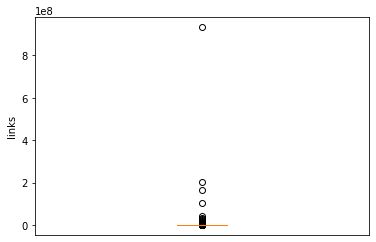

In [27]:
import matplotlib.pyplot as plt

plt.boxplot(data['links'])
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.ylabel('links')
plt.show()

In [28]:
import sys

def add_groups(df):
  bins = [0, 10, 100, 1_000, 10_000, sys.maxsize]
  labels = ['<10', '10-100', '100-1000', '1000-10000', '>10000']
  group = pd.cut(df['links'], bins=bins, labels=labels)
  df['group'] = group
  return df

add_groups(data)

data.sort_values(by='links', ascending=False)

,links,req,group
5222,933353585,Upon receipt of a new or modified flight route...,>10000
1685,200435096,Mapping interfaces and data dictionaries must ...,>10000
736,166364820,If the temperature setting value is strictly l...,>10000
3880,102094840,"As a moderator, I want to select whether to ha...",>10000
2111,40168190,This may include creating contracting authorit...,>10000
...,...,...,...
625,1,The on line databases can be considered part o...,<10
2755,1,The product must make use of web or applicatio...,<10
4348,1,"As a trainee, I want to limit to one registrat...",<10
3722,1,"As a member, I want to receive a reminder and ...",<10


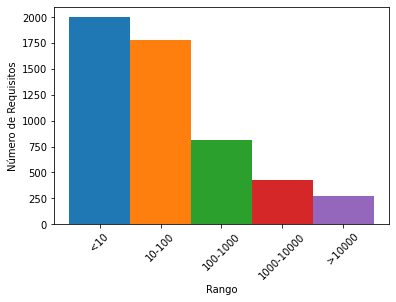

In [29]:
by_group = data.groupby('group')

groups = by_group['links'].count()

plt.bar(groups.index, groups, 1, color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.xlabel("Rango")
plt.ylabel("Número de Requisitos")
plt.xticks(rotation=45)

plt.show()

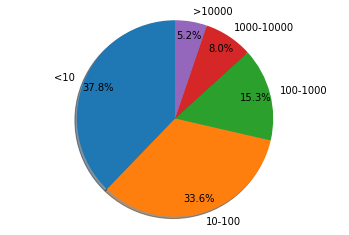

In [30]:
fig1, ax1 = plt.subplots()
ax1.pie(groups, labels=groups.index, autopct='%1.1f%%',
        shadow=True, startangle=90, rotatelabels=False, pctdistance=0.85)
ax1.axis('equal')

plt.show()

In [31]:
def add_groups_2(df):
  bins = [0, 11, 120, sys.maxsize] # 8, 77
  labels = ['baja', 'moderada', 'alta']
  group = pd.cut(df['links'], bins=bins, labels=labels)
  df['group_2'] = group
  return df

add_groups_2(data)

,links,req,group,group_2
0,198,The solution should provide detailed context s...,100-1000,alta
1,282,The solution should provide an interface for t...,100-1000,alta
2,34,"The solution should send alerts (for example, ...",10-100,moderada
3,8,The solution should enable the user to track t...,<10,baja
4,401597,The solution should enable the help desk user ...,>10000,alta
...,...,...,...,...
5286,120,A client shall register with the User Interfac...,100-1000,moderada
5287,192,A client shall register with the User Interfac...,100-1000,alta
5288,60,A client shall register with the User Interfac...,10-100,moderada
5289,16,If a client registers for notifications the Us...,10-100,moderada


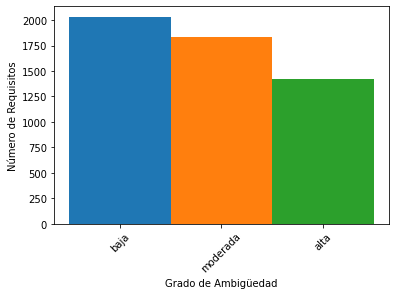

In [32]:
by_group = data.groupby('group_2')

groups = by_group['links'].count()

plt.bar(groups.index, groups, 1, color=['tab:blue', 'tab:orange', 'tab:green'])
plt.xlabel("Grado de Ambigüedad")
plt.ylabel("Número de Requisitos")
plt.xticks(rotation=45)

plt.show()

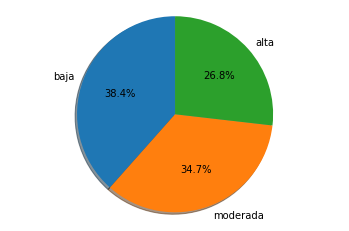

In [33]:
fig1, ax1 = plt.subplots()
ax1.pie(groups, labels=groups.index, shadow=True, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [34]:
def word_count(req):
  result = len(req.split())
  return pd.Series(result, index=['word_count'])

def add_word_count(df, col):
  wc = df[col].apply(word_count)
  df[wc.columns] = wc

  return df

add_word_count(data, 'req')

,links,req,group,group_2,word_count
0,198,The solution should provide detailed context s...,100-1000,alta,23
1,282,The solution should provide an interface for t...,100-1000,alta,22
2,34,"The solution should send alerts (for example, ...",10-100,moderada,26
3,8,The solution should enable the user to track t...,<10,baja,14
4,401597,The solution should enable the help desk user ...,>10000,alta,26
...,...,...,...,...,...
5286,120,A client shall register with the User Interfac...,100-1000,moderada,25
5287,192,A client shall register with the User Interfac...,100-1000,alta,30
5288,60,A client shall register with the User Interfac...,10-100,moderada,24
5289,16,If a client registers for notifications the Us...,10-100,moderada,16


In [35]:
data.dtypes

links            int64
req             object
group         category
group_2       category
word_count       int64
dtype: object

In [36]:
# https://pbpython.com/categorical-encoding.html

data["group_cat"] = data["group"].cat.codes
data["group_2_cat"] = data["group_2"].cat.codes

data

,links,req,group,group_2,word_count,group_cat,group_2_cat
0,198,The solution should provide detailed context s...,100-1000,alta,23,2,2
1,282,The solution should provide an interface for t...,100-1000,alta,22,2,2
2,34,"The solution should send alerts (for example, ...",10-100,moderada,26,1,1
3,8,The solution should enable the user to track t...,<10,baja,14,0,0
4,401597,The solution should enable the help desk user ...,>10000,alta,26,4,2
...,...,...,...,...,...,...,...
5286,120,A client shall register with the User Interfac...,100-1000,moderada,25,2,1
5287,192,A client shall register with the User Interfac...,100-1000,alta,30,2,2
5288,60,A client shall register with the User Interfac...,10-100,moderada,24,1,1
5289,16,If a client registers for notifications the Us...,10-100,moderada,16,1,1


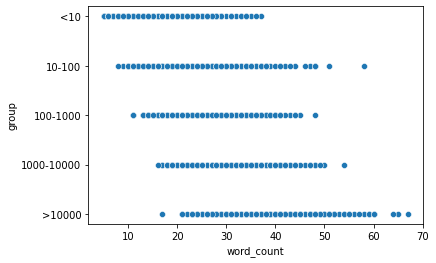

In [37]:
import seaborn as sns

sns.scatterplot(data=data, x="word_count", y="group")

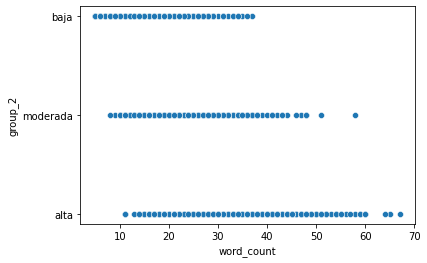

In [38]:
sns.scatterplot(data=data, x="word_count", y="group_2")

In [39]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=7000)
tokenizer.fit_on_texts(data['req'])

print("Numero de palabras diferentes en el corpus")
len(tokenizer.word_index)

Numero de palabras diferentes en el corpus


6386

In [40]:
data['word_count'].sum()

109789

In [41]:
data['word_count'].mean()

20.75014175014175

In [42]:
data['word_count'].max()

67

In [43]:
data['word_count'].min()

5

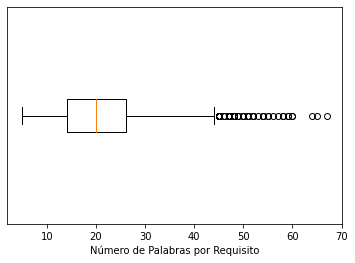

In [44]:
plt.boxplot(data['word_count'], vert=False)
plt.tick_params(axis='y', labelleft=False, left=False, bottom=False, labelbottom=False)
plt.xlabel('Número de Palabras por Requisito')
plt.show()

In [45]:
data.describe()

,links,word_count,group_cat,group_2_cat
count,5.291000e+03,5291.000000,5291.000000,5291.000000
mean,3.126105e+05,20.750142,1.092799,0.883765
std,1.342540e+07,8.522423,1.146659,0.799517
min,1.000000e+00,5.000000,0.000000,0.000000
25%,5.000000e+00,14.000000,0.000000,0.000000
50%,2.300000e+01,20.000000,1.000000,1.000000
75%,1.470000e+02,26.000000,2.000000,2.000000
max,9.333536e+08,67.000000,4.000000,2.000000


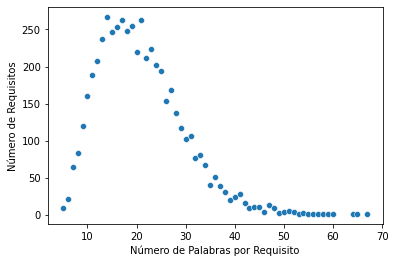

In [46]:
import matplotlib.pyplot as plt

freqs = data.groupby('word_count').count()['req']

fig = sns.scatterplot(x=freqs.index, y=freqs)
fig.set(xlabel='Número de Palabras por Requisito', ylabel='Número de Requisitos')
plt.show()